In [38]:
from IDMInterface import IDMSimulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def max_ave_velocity(cars, length=1500, lanes=3):
    steps = 800*30
    fn, df = IDMSimulation(road_length=length,
                          cars=cars,
                          lanes=3,
                          step_width=1/30,                
                          steps=steps)
    
    t = df['t']
    velocities = np.zeros(shape=(steps, cars))
    for car_index in range(0,cars):
        for step in range(0, steps):
            velocities[step, car_index] = df['v' + str(car_index)][step]
    average_velocity = np.mean(velocities, axis=1)
    return average_velocity.max()

In [40]:
from multiprocessing import Pool, Process, Value, Array

In [48]:
car_num = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]# a bit long for testing
#car_num = [10,20,30,40,50,60,70,80,90,100]

processes = l = [None] * len(car_num)
average_max_velocity = np.array(car_num)

average_max_velocity = Array('d', range(len(car_num)))

def calculate_for_index(index, car_num, target):
    target[i] = max_ave_velocity(car_num[i])

for i in range(0, len(car_num)):
    p = Process(target=calculate_for_index, args=(i, car_num, average_max_velocity))
    p.start()
    processes[i] = p
    
for i in range(len(processes)):
    processes[i].join()
    
average_max_velocity = np.array(average_max_velocity)


microscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_30_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 1500 --cars 40 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_40_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 1500 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_50_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 1500 --cars 60 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv

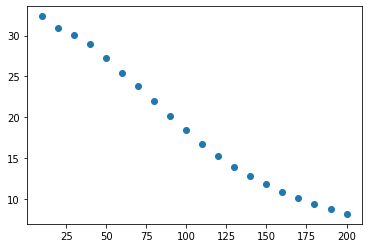

In [42]:
plt.scatter(car_num, average_max_velocity)

## Concurrency using threading module

In [13]:
import threading

In [14]:
car_num = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
threads = l = [None] * len(car_num)
average_max_velocity = np.array(car_num)

def calculate_for_index(index, car_num, target):
    target[i] =  max_ave_velocity(car_num[i])

for i in range(0, len(car_num)):
    t = threading.Thread(target=calculate_for_index, args=(i, car_num, average_max_velocity))
    t.start()
    threads[i] = t
    
for i in range(len(threads)):
    threads[i].join()

microscopicIDM --road-length 2000 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/2000_10_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 2000 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/2000_20_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 2000 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/2000_30_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 2000 --cars 40 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/2000_40_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 2000 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/2000_50_3_0.03333333333333333_24000.csv
microscopicIDM --road-length 2000 --cars 60 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv